# pandas 进阶修炼 ｜早起Python
<br>

**本习题由公众号【早起Python & 可视化图鉴】 原创，转载及其他形式合作请与我们联系（微信号`sshs321`)，未经授权严禁搬运及二次创作，侵权必究！**



本习题基于 `pandas` 版本 `1.1.3`，所有内容应当在 `Jupyter Notebook` 中执行以获得最佳效果。

不同版本之间写法可能会有少许不同，如若碰到此情况，你应该学会如何自行检索解决。

## 东京奥运会奖牌分析可视化


<br>

现在，让我们用一个简单的数据集来对之前的 pandas 操作。

本次实战将使用两份东京奥运会数据进行。

将以数据分析可视化为主题，涉及到几乎前面每个章节的内容。

为了方便大家理解题意，我将会保留部分习题的运行结果。


## 初始化

<br>

该 `Notebook` 版本为**纯习题版**

如果需要答案或者提示，可以微信搜索公众号「早起Python」获取！

## 数据加载与预处理

### 1 - 加载数据

读取当前目录下
- 东京奥运会奖牌数据.csv -> df1
- 东京奥运会奖牌分日数据.csv -> df2

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
# 中文

if sys.platform == 'darwin':
    plt.rcParams['font.sans-serif']=['Songti SC'] 
else:
    plt.rcParams['font.sans-serif']=['SimHei'] 
    
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')

df1 = pd.read_csv('./东京奥运会奖牌数据.csv')
df2 = pd.read_csv('./东京奥运会奖牌分日数据.csv')


In [58]:
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')

### 2- 修改列名

<br>

将原 `df1` 列名 `Unnamed: 2`、`Unnamed: 3`、`Unnamed: 4` 修改为 `金牌数`、`银牌数`、`铜牌数`

In [59]:
df1.rename(columns= {
    'Unnamed: 2':'金牌数',
    'Unnamed: 3':'银牌数',
    'Unnamed: 4':'铜牌数'}, inplace = True )

### 3 - 数据类型查看

查看 df2 的数据类型

In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   获奖时间    1083 non-null   object
 1   奖牌类型    1083 non-null   int64 
 2   运动员     1083 non-null   object
 3   国家id    1083 non-null   int64 
 4   运动类别    1083 non-null   object
dtypes: int64(2), object(3)
memory usage: 42.4+ KB


### 4 - 类型修改

将 df2 的获奖时间修改为 时间格式

In [61]:
df2 = df2.astype({'获奖时间':np.Datetime64})

### 5 - 数据排序

将 df2 按照获奖时间升序排列

In [62]:
df2.sort_values(['获奖时间'], ascending=True)

获奖时间  奖牌类型                   运动员   国家id 运动类别
1082 2021-07-24 00:00:00     3  亚力杭德拉·瓦伦西亚/路易斯·阿尔瓦雷斯    156   射箭
1081 2021-07-24 00:00:00     2               史蒂夫·维勒等      1   射箭
1080 2021-07-24 00:00:00     1                安山/金智德    106   射箭
1077 2021-07-24 07:30:00     1                    杨倩     26   射击
1079 2021-07-24 07:30:00     3               妮娜·克里斯汀    149   射击
...                  ...   ...                   ...    ...  ...
4    2021-08-08 14:49:00     1             巴霍迪尔·贾洛洛夫     15   拳击
3    2021-08-08 15:34:00     2             俄奥委会女子手球队  23062   手球
2    2021-08-08 15:34:00     1               法国女子手球队    144   手球
1    2021-08-08 16:44:00     2               希腊男子水球队    171   水球
0    2021-08-08 16:44:00     1             塞尔维亚男子水球队    107   水球

[1083 rows x 5 columns]

### 6 - 匹配修改

给 df2 新增一列国家，总奖牌数，值根据 国家id 与 df1 匹配

注意：原始数据可能有一点问题，射击队杨倩应该是东京首金

In [63]:
df2['总奖牌数'] = df2.国家id.apply(lambda x: df1[df1.国家id == x][['金牌数','银牌数','铜牌数']].sum(axis=1).iloc[0])

df2

获奖时间  奖牌类型                   运动员   国家id 运动类别  总奖牌数
0    2021-08-08 16:44:00     1             塞尔维亚男子水球队    107   水球     9
1    2021-08-08 16:44:00     2               希腊男子水球队    171   水球     4
2    2021-08-08 15:34:00     1               法国女子手球队    144   手球    33
3    2021-08-08 15:34:00     2             俄奥委会女子手球队  23062   手球    71
4    2021-08-08 14:49:00     1             巴霍迪尔·贾洛洛夫     15   拳击     5
...                  ...   ...                   ...    ...  ...   ...
1078 2021-07-24 07:30:00     2           阿纳斯塔西娅·加拉西娜  23062   射击    71
1079 2021-07-24 07:30:00     3               妮娜·克里斯汀    149   射击    13
1080 2021-07-24 00:00:00     1                安山/金智德    106   射箭    20
1081 2021-07-24 00:00:00     2               史蒂夫·维勒等      1   射箭    36
1082 2021-07-24 00:00:00     3  亚力杭德拉·瓦伦西亚/路易斯·阿尔瓦雷斯    156   射箭     4

[1083 rows x 6 columns]

In [64]:
df3 = pd.merge(left=df2, right=df1, how='left', on='国家id')

df2['总奖牌数'] = df3.金牌数 + df3.银牌数 + df3.铜牌数
df2['国家'] = df3.国家奥委会

## 数据分析

### 7 - 分组统计

通过对 df2 的国家进行分组统计，计算每个国家的奖牌总数（也就是出现次数）

并查看奖牌数前5名，结果可以用 df1 进行验证

In [65]:
df2.国家.value_counts().sort_values(ascending=False)[:5]

美国     113
中国      88
ROC     71
英国      65
日本      58
Name: 国家, dtype: int64

In [66]:
df2.groupby('国家').size().sort_values(ascending=False)[:5]

国家
美国     113
中国      88
ROC     71
英国      65
日本      58
dtype: int64

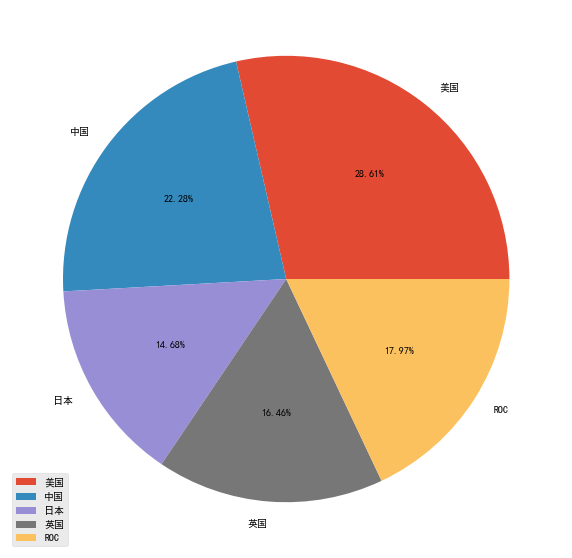

In [67]:
temp = df1.loc[:4,['国家奥委会','总分']]

plt.figure(figsize=(10,10))
plt.axis('equal')
plt.pie(temp.总分, labels=temp.国家奥委会,autopct=lambda x: '%0.2f%%'%(x))
plt.legend(temp.国家奥委会)
plt.show()

In [68]:
df1.loc[:5,'国家奥委会'].values

array(['美国', '中国', '日本', '英国', 'ROC', '澳大利亚'], dtype=object)

### 8 - 数据统计

通过 df2 计算获得奖牌最多的运动员

注意：仅统计单人项目

In [11]:
df2.运动员.value_counts().sort_values(ascending=False)[:5]

塞勒博·德雷赛尔     3
张雨霏          2
罗伯特·芬克       2
米哈伊罗·罗曼丘克    2
大桥悠依         2
Name: 运动员, dtype: int64

In [12]:
df2.groupby(by='运动员', as_index=False).运动员.size().sort_values('size', ascending=False)[:5]

运动员  size
271  塞勒博·德雷赛尔     3
422       张雨霏     2
756       肖若腾     2
292     大卫·尼卡     2
557      桥本大辉     2

### 9 - 数据查看

查看乒乓球项目的全部信息

In [69]:
df2[df2.运动类别 == '乒乓球']

获奖时间  奖牌类型             运动员  国家id 运动类别  总奖牌数    国家
164 2021-08-06 20:42:00     2       派翠克·法兰兹卡等     2  乒乓球    37    德国
165 2021-08-06 20:40:00     1       马龙/许昕/樊振东    26  乒乓球    88    中国
209 2021-08-06 12:42:00     3              日本    18  乒乓球    58    日本
223 2021-08-05 20:41:00     2  伊藤美诚/石川佳纯/平野美宇    18  乒乓球    58    日本
227 2021-08-05 20:34:00     1      陈梦/王曼昱/孙颖莎    26  乒乓球    88    中国
283 2021-08-05 12:39:00     3     杜凯琹/苏慧音/李皓晴    38  乒乓球     6  中国香港
662 2021-07-30 21:29:00     1              马龙    26  乒乓球    88    中国
663 2021-07-30 21:29:00     2             樊振东    26  乒乓球    88    中国
664 2021-07-30 20:16:00     3       迪米特里·奥恰洛夫     2  乒乓球    37    德国
727 2021-07-29 21:10:00     1              陈梦    26  乒乓球    88    中国
728 2021-07-29 21:10:00     2             孙颖莎    26  乒乓球    88    中国
734 2021-07-29 20:02:00     3            伊藤美诚    18  乒乓球    58    日本
922 2021-07-26 22:00:00     1        水谷隼/伊藤美诚    18  乒乓球    58    日本
923 2021-07-26 22:00:00     2          许昕/刘诗雯    26  乒乓球    88    中国
986 2021-07-26 00:00:00     3         林昀儒/郑怡静    31  乒乓球    12  中华台北

### 10 - 数据透视

查看各国在不同项目上的获奖牌情况

In [70]:
df2.groupby(['国家','运动类别'],as_index=False).size().set_index(['国家','运动类别'])

size
国家   运动类别        
ROC  三人篮球       2
     击剑         8
     古典式摔跤      3
     场地自行车赛     2
     射击         8
...           ...
韩国   竞技体操       2
     羽毛球        1
     跆拳道        3
马来西亚 场地自行车赛     1
     羽毛球        1

[516 rows x 1 columns]

In [15]:
df2.pivot_table(index=['国家','运动类别'], values='奖牌类型', aggfunc='count')

奖牌类型
国家   运动类别        
ROC  三人篮球       2
     击剑         8
     古典式摔跤      3
     场地自行车赛     2
     射击         8
...           ...
韩国   竞技体操       2
     羽毛球        1
     跆拳道        3
马来西亚 场地自行车赛     1
     羽毛球        1

[516 rows x 1 columns]

### 11 - 数据查询

在上一题的基础上，查询中国队的获奖牌详情

In [71]:
df2.groupby(['国家','运动类别'],as_index=False).size().set_index(['国家','运动类别']).query('国家 == ["中国"]')

size
国家 运动类别        
中国 三人篮球       1
   举重         8
   乒乓球        7
   击剑         1
   古典式摔跤      1
   场地自行车赛     1
   射击        11
   帆船         2
   拳击         2
   游泳         6
   田径         5
   空手道        2
   竞技体操       8
   羽毛球        6
   自由式摔跤      3
   花样游泳       2
   赛艇         3
   跆拳道        1
   跳水        12
   蹦床体操       3
   静水皮划艇      3

In [72]:
df2[df2.国家 == '中国'].pivot_table(index=['国家','运动类别'], values='奖牌类型', aggfunc=np.size)

奖牌类型
国家 运动类别        
中国 三人篮球       1
   举重         8
   乒乓球        7
   击剑         1
   古典式摔跤      1
   场地自行车赛     1
   射击        11
   帆船         2
   拳击         2
   游泳         6
   田径         5
   空手道        2
   竞技体操       8
   羽毛球        6
   自由式摔跤      3
   花样游泳       2
   赛艇         3
   跆拳道        1
   跳水        12
   蹦床体操       3
   静水皮划艇      3

### 12 - 个性化查看

在数据框中根据奖牌数量进行可视化

In [73]:
df2[df2.国家 == '中国'].pivot_table(index=['国家','运动类别'], values='奖牌类型', aggfunc=np.size).style.bar(color='skyblue', subset='奖牌类型')

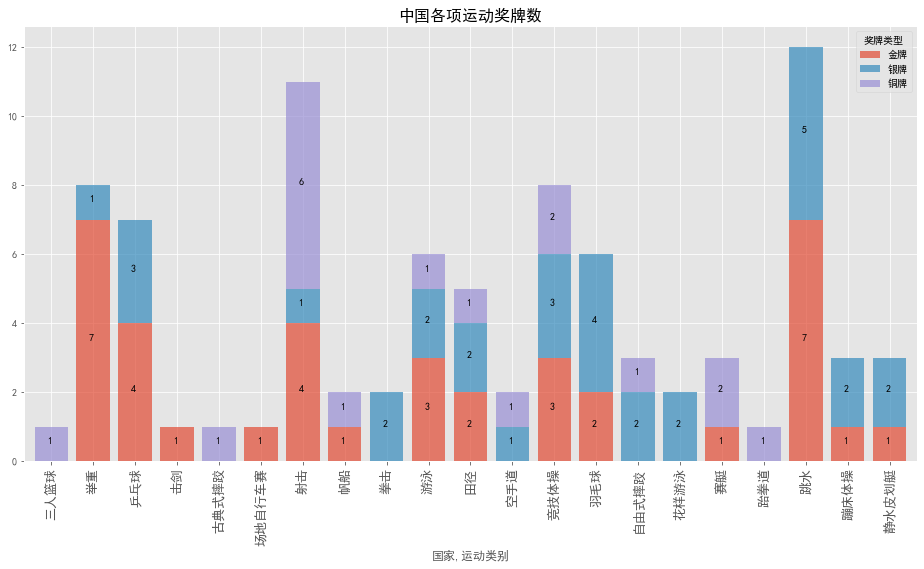

In [100]:
temp = df2[df2.国家 == '中国'].pivot_table(index=['国家','运动类别'], columns=df2.奖牌类型.map({1:'金牌',2:'银牌',3:'铜牌'}), values='奖牌类型', aggfunc=np.size).fillna(0)

ax = temp.plot.bar(figsize=(16,8), y=['金牌','银牌','铜牌'], stacked=True, width=0.8, alpha=0.7)
ax.set_xticklabels(list(map(lambda x: x[1], temp.index)), fontsize=13)
plt.title('中国各项运动奖牌数', fontsize="16")

x = 0
for k, r in temp.iterrows():
    if (r.金牌 > 0):
        ax.text(x-0.1, r.金牌 /2, str(int(r.金牌)))
    if (r.银牌 > 0):
        ax.text(x-0.1, r.金牌 + r.银牌 /2, str(int(r.银牌)))
    if (r.铜牌 > 0):
        ax.text(x-0.1, r.金牌 + r.银牌 + r.铜牌/2, str(int(r.铜牌)))
    x+=1

plt.show()

In [91]:
x = 0
for k, r in temp.iterrows():
    print()

TypeError: ord() expected string of length 1, but tuple found

### 13 - 数据格式化

将 df2 的获奖时间格式化为 x月x日

In [74]:
#df2[:5].style.format({"获奖时间": '%Y-%M-%d'})
df2.获奖时间 = df2.获奖时间.apply(lambda x: x.strftime('%m-%d') )

### 14 - 分组统计

查看每天产生奖牌的数量

In [20]:
df2.groupby('获奖时间').国家.size()

获奖时间
07-24     35
07-25     58
07-26     68
07-27     71
07-28     71
07-29     53
07-30     65
07-31     70
08-01     76
08-02     64
08-03     81
08-04     59
08-05     95
08-06     80
08-07    103
08-08     34
Name: 国家, dtype: int64

### 15 - 数据透视

查看不同项目在不同国家的分布情况

In [21]:
df2.pivot_table(index=['运动类别','国家'], values='奖牌类型', aggfunc=np.size)

奖牌类型
运动类别   国家        
七人制橄榄球 斐济       2
       新西兰      2
       法国       1
       阿根廷      1
三人篮球   ROC      2
...           ...
高尔夫    中华台北     1
       斯洛伐克     1
       新西兰      1
       日本       1
       美国       2

[516 rows x 1 columns]

### 16 - 数据计算

计算中国每日总奖牌数量

In [22]:
pd.pivot_table(df2[df2.国家 == '中国'], index=['获奖时间','国家'], values='奖牌类型',aggfunc=np.size).cumsum()

奖牌类型
获奖时间  国家      
07-24 中国     4
07-25 中国    11
07-26 中国    18
07-27 中国    21
07-28 中国    27
07-29 中国    31
07-30 中国    40
07-31 中国    46
08-01 中国    51
08-02 中国    62
08-03 中国    69
08-04 中国    70
08-05 中国    74
08-06 中国    79
08-07 中国    87
08-08 中国    88

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38431 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 33719 missing from current font.
  font.set_tex

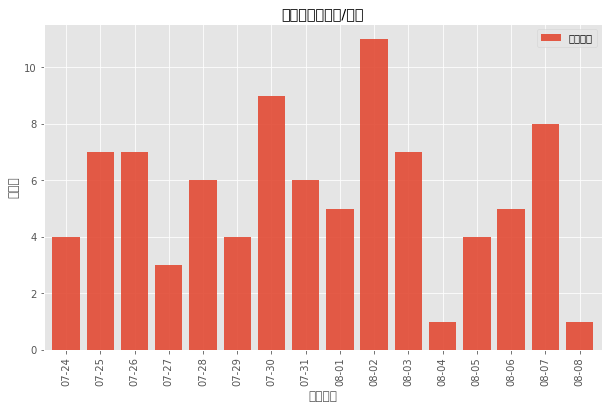

In [23]:
temp = pd.pivot_table(df2[df2.国家 == '中国'], index=['获奖时间','国家'], values='奖牌类型',aggfunc=np.size).reset_index()
temp.drop(columns='国家', inplace=True)
temp.set_index('获奖时间', inplace=True)

ax = temp.plot.bar(figsize=(10,6), width=0.8,  alpha=0.9, ylabel="奖牌数")
plt.title('中国队获奖情况/每天')
#plt.legend('fdsafd')
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 32047 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 35745 missing from current font.
  font.set_tex

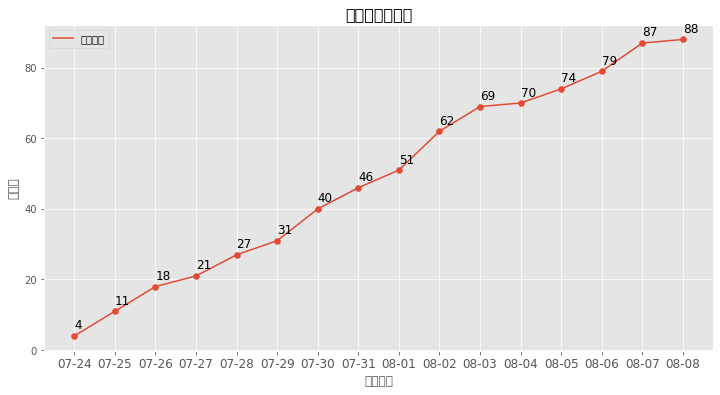

In [24]:
temp = pd.pivot_table(df2[df2.国家 == '中国'], index=['获奖时间','国家'], values='奖牌类型',aggfunc=np.size).cumsum().reset_index()
temp.drop(columns='国家', inplace=True)
temp.set_index('获奖时间', inplace=True)
ax = temp.plot(kind='line', figsize=(12,6), ylabel='奖牌数')
ax.legend(['奖牌累计'])

plt.scatter(temp.index, temp['奖牌类型'])
plt.xticks(temp.index, temp.index, fontsize=12) # 指定 x坐标

plt.title('中国累计奖牌数', fontsize=16)

for x, y in zip(temp.index, temp.奖牌类型):
    plt.text(x, y + 2, str(y),fontsize=12)

plt.show()

In [68]:
temp

奖牌类型
获奖时间       
07-24     4
07-25    11
07-26    18
07-27    21
07-28    27
07-29    31
07-30    40
07-31    46
08-01    51
08-02    62
08-03    69
08-04    70
08-05    74
08-06    79
08-07    87
08-08    88

In [69]:

pd.pivot_table(df2[df2.国家 == '中国'], index=['获奖时间','国家'], values='奖牌类型',aggfunc=np.size).reset_index()

获奖时间  国家  奖牌类型
0   07-24  中国     4
1   07-25  中国     7
2   07-26  中国     7
3   07-27  中国     3
4   07-28  中国     6
5   07-29  中国     4
6   07-30  中国     9
7   07-31  中国     6
8   08-01  中国     5
9   08-02  中国    11
10  08-03  中国     7
11  08-04  中国     1
12  08-05  中国     4
13  08-06  中国     5
14  08-07  中国     8
15  08-08  中国     1

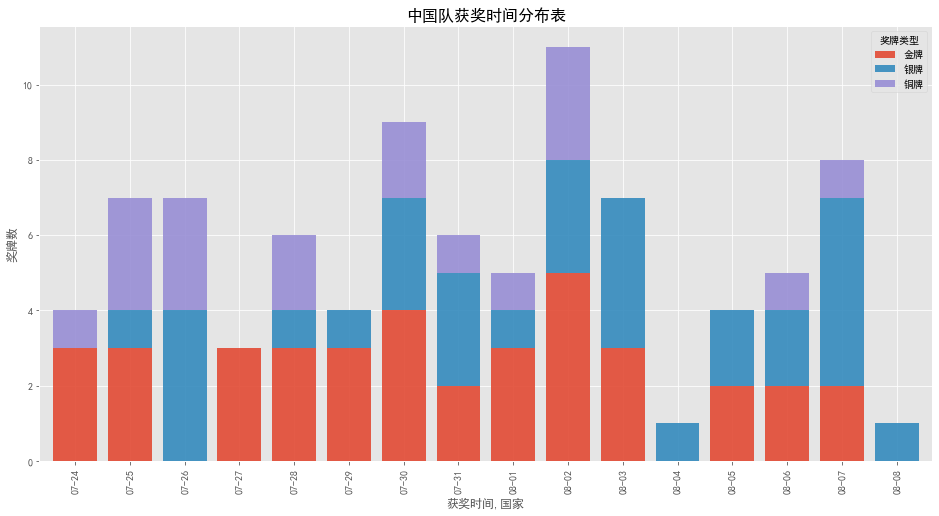

In [70]:
temp = pd.pivot_table(df2[df2.国家 == '中国'], index=['获奖时间','国家'], columns=df2.奖牌类型.map({1:'金牌',2:'银牌',3:'铜牌'}), values='奖牌类型',aggfunc=np.size)
temp.fillna(0, inplace=True)

ax = temp.plot.bar(figsize=(16,8), y=['金牌','银牌','铜牌'], ylabel='奖牌数', stacked =True, grid=True, width=0.8, alpha=0.9)
ax.set_xticklabels([col[0] for col in temp.index])
plt.title('中国队获奖时间分布表', fontsize=16)
plt.show()


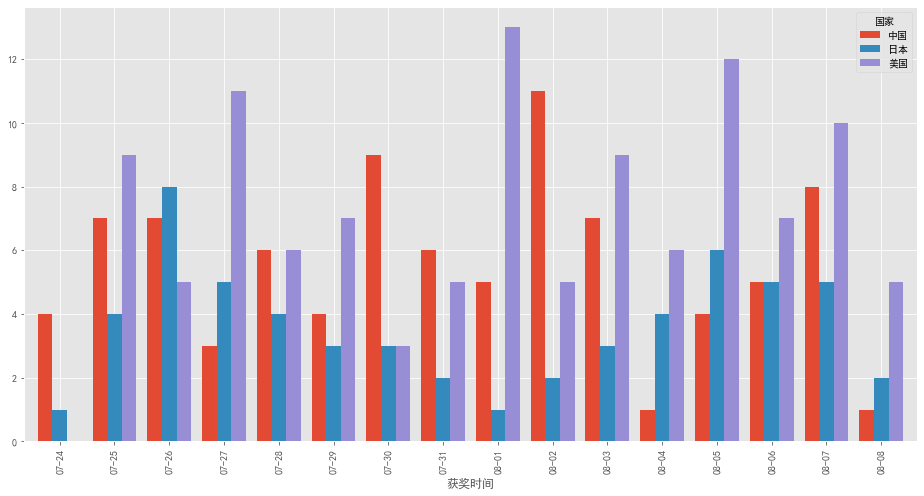

In [71]:
temp = pd.pivot_table( data = df2[df2.国家id.isin(df1.loc[df1.排名.sort_values()[:3].index]['国家id'].values)], 
    index='获奖时间', columns='国家', values='奖牌类型',aggfunc=np.size).fillna(0)

ax = temp.plot.bar(figsize=(16,8), width=0.8)
plt.show()

In [72]:
pd.pivot_table( data = df2[df2.国家id.isin(df1.loc[df1.排名.sort_values()[:3].index]['国家id'].values)], 
    index='获奖时间', columns=['国家', df2.奖牌类型.map({1:'金牌',2:'银牌',3:'铜牌'})], values='运动员',aggfunc=np.size).fillna(0)

国家      中国             日本             美国          
奖牌类型    金牌   铜牌   银牌   金牌   铜牌   银牌   金牌   铜牌   银牌
获奖时间                                              
07-24  3.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
07-25  3.0  3.0  1.0  4.0  0.0  0.0  4.0  3.0  2.0
07-26  0.0  3.0  4.0  4.0  3.0  1.0  3.0  1.0  1.0
07-27  3.0  0.0  0.0  2.0  2.0  1.0  2.0  4.0  5.0
07-28  3.0  2.0  1.0  3.0  0.0  1.0  2.0  1.0  3.0
07-29  3.0  0.0  1.0  2.0  1.0  0.0  3.0  1.0  3.0
07-30  4.0  2.0  3.0  2.0  1.0  0.0  0.0  1.0  2.0
07-31  2.0  1.0  3.0  0.0  1.0  1.0  2.0  2.0  1.0
08-01  3.0  1.0  1.0  0.0  1.0  0.0  4.0  3.0  6.0
08-02  5.0  3.0  3.0  0.0  1.0  1.0  2.0  1.0  2.0
08-03  3.0  0.0  4.0  2.0  1.0  0.0  2.0  4.0  3.0
08-04  0.0  0.0  1.0  2.0  1.0  1.0  1.0  2.0  3.0
08-05  2.0  0.0  2.0  1.0  2.0  3.0  4.0  4.0  4.0
08-06  2.0  1.0  2.0  2.0  2.0  1.0  2.0  4.0  1.0
08-07  2.0  1.0  5.0  3.0  1.0  1.0  5.0  2.0  3.0
08-08  0.0  0.0  1.0  0.0  0.0  2.0  3.0  0.0  2.0

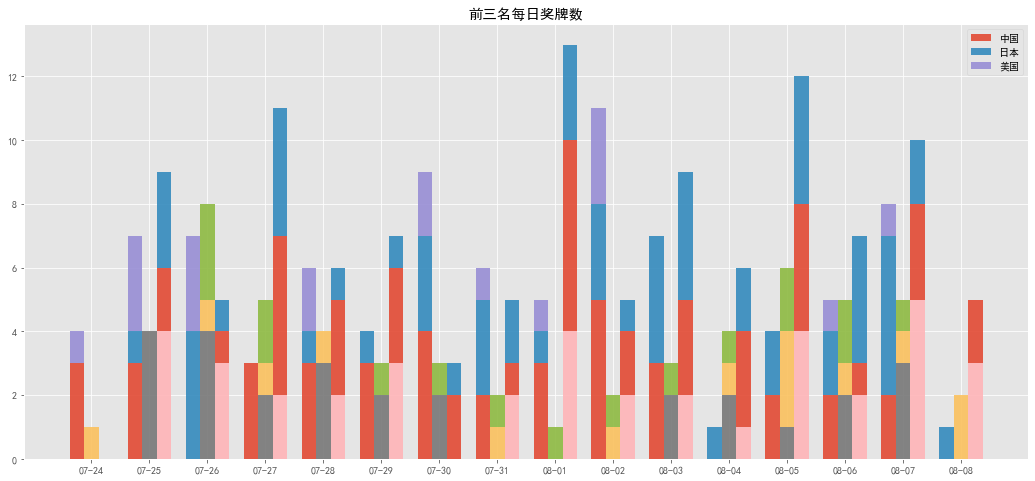

In [96]:
temp = pd.pivot_table( data = df2[df2.国家id.isin(df1.loc[df1.排名.sort_values()[:3].index]['国家id'].values)], 
    index='获奖时间', columns=['国家', df2.奖牌类型.map({1:'金牌',2:'银牌',3:'铜牌'})], values='运动员',aggfunc=np.size).fillna(0)

X = pd.Series([i for i in range(len(temp))])
BarWidth = 0.25
Cols = temp.columns.levels[0].values

plt.figure(figsize=(18,8))
plt.title('前三名每日奖牌数')
off = -BarWidth

for c in Cols:
    plt.bar(X+off, temp.loc[:,(c,'金牌')], width=BarWidth, alpha = 0.9)
    plt.bar(X+off, temp.loc[:,(c,'银牌')], bottom=temp.loc[:,(c,'金牌')], width=BarWidth, alpha = 0.9)
    plt.bar(X+off, temp.loc[:,(c,'铜牌')], bottom=temp.loc[:,(c,'金牌')] + temp.loc[:,(c,'银牌')],  width=BarWidth, alpha = 0.9)
    off += BarWidth


plt.legend(Cols)
plt.xticks(X, temp.index)

plt.show()

In [77]:
temp.loc[:,('中国','金牌')]

国家      中国             日本             美国          
奖牌类型    金牌   铜牌   银牌   金牌   铜牌   银牌   金牌   铜牌   银牌
获奖时间                                              
07-24  3.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
07-25  3.0  3.0  1.0  4.0  0.0  0.0  4.0  3.0  2.0
07-26  0.0  3.0  4.0  4.0  3.0  1.0  3.0  1.0  1.0
07-27  3.0  0.0  0.0  2.0  2.0  1.0  2.0  4.0  5.0
07-28  3.0  2.0  1.0  3.0  0.0  1.0  2.0  1.0  3.0
07-29  3.0  0.0  1.0  2.0  1.0  0.0  3.0  1.0  3.0
07-30  4.0  2.0  3.0  2.0  1.0  0.0  0.0  1.0  2.0
07-31  2.0  1.0  3.0  0.0  1.0  1.0  2.0  2.0  1.0
08-01  3.0  1.0  1.0  0.0  1.0  0.0  4.0  3.0  6.0
08-02  5.0  3.0  3.0  0.0  1.0  1.0  2.0  1.0  2.0
08-03  3.0  0.0  4.0  2.0  1.0  0.0  2.0  4.0  3.0
08-04  0.0  0.0  1.0  2.0  1.0  1.0  1.0  2.0  3.0
08-05  2.0  0.0  2.0  1.0  2.0  3.0  4.0  4.0  4.0
08-06  2.0  1.0  2.0  2.0  2.0  1.0  2.0  4.0  1.0
08-07  2.0  1.0  5.0  3.0  1.0  1.0  5.0  2.0  3.0
08-08  0.0  0.0  1.0  0.0  0.0  2.0  3.0  0.0  2.0

### 17 - 数据计算

计算前十名各国每日奖牌数量合计

注意：对于第一天没有数据的国家用0填充，其余时间的缺失值用上一日数据填充

In [43]:
pd.pivot_table( data = df2[df2.国家id.isin(df1.loc[df1.排名.sort_values()[:10].index]['国家id'].values)], 
    index='获奖时间', columns='国家', values='奖牌类型',aggfunc=np.size).fillna(0).cumsum()

国家      ROC    中国    德国   意大利    日本    法国  澳大利亚     美国    英国    荷兰
获奖时间                                                              
07-24   2.0   4.0   0.0   2.0   1.0   0.0   0.0    0.0   0.0   1.0
07-25   7.0  11.0   2.0   5.0   5.0   3.0   3.0    9.0   2.0   2.0
07-26  12.0  18.0   3.0   9.0  13.0   5.0   6.0   14.0   7.0   3.0
07-27  18.0  21.0   5.0  12.0  18.0   7.0   9.0   25.0  13.0   3.0
07-28  23.0  27.0  10.0  15.0  22.0   8.0  16.0   31.0  16.0  11.0
07-29  28.0  31.0  13.0  19.0  25.0  11.0  20.0   38.0  18.0  13.0
07-30  34.0  40.0  16.0  20.0  28.0  13.0  22.0   41.0  24.0  15.0
07-31  37.0  46.0  17.0  24.0  30.0  19.0  27.0   46.0  28.0  16.0
08-01  44.0  51.0  19.0  27.0  31.0  21.0  31.0   59.0  32.0  17.0
08-02  50.0  62.0  23.0  28.0  33.0  23.0  33.0   64.0  35.0  18.0
08-03  52.0  69.0  30.0  29.0  36.0  24.0  33.0   73.0  43.0  20.0
08-04  53.0  70.0  32.0  30.0  40.0  25.0  36.0   79.0  48.0  23.0
08-05  58.0  74.0  34.0  35.0  46.0  27.0  41.0   91.0  51.0  26.0
08-06  62.0  79.0  36.0  38.0  51.0  27.0  44.0   98.0  58.0  31.0
08-07  69.0  87.0  37.0  39.0  56.0  32.0  46.0  108.0  63.0  33.0
08-08  71.0  88.0  37.0  40.0  58.0  33.0  46.0  113.0  65.0  36.0

<AxesSubplot:xlabel='获奖时间'>

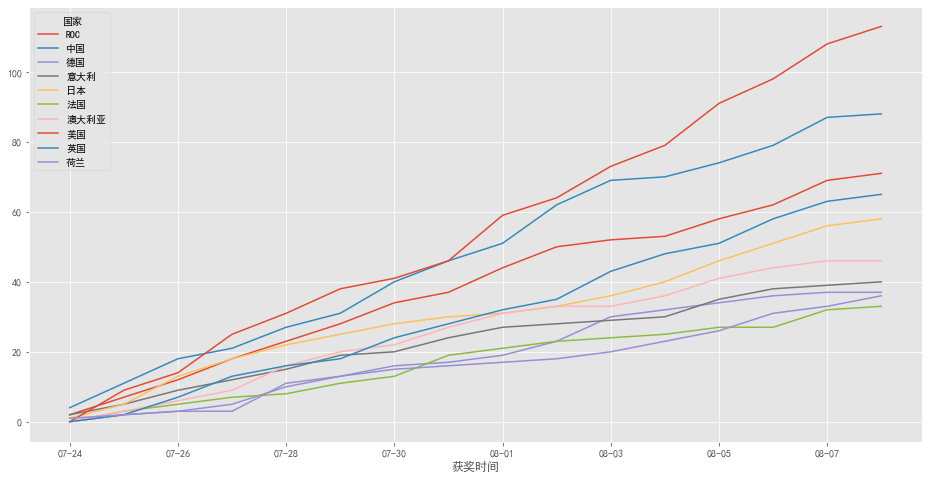

In [42]:
pd.pivot_table( data = df2[df2.国家id.isin(df1.loc[df1.排名.sort_values()[:10].index]['国家id'].values)], 
    index='获奖时间', columns='国家', values='奖牌类型',aggfunc=np.size).fillna(0).cumsum().plot(kind='line', figsize=(16,8))


## 数据可视化

下面是一些数据可视化的操作

由于部分是之前未涉及的内容，所以以下全部习题我将保留答案。也不可使用 ans 查看答案

### 18 - 条形图

对金牌数量排行前10的国家制作条形图

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Songti SC
C:\Users\songzhao\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32654 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\songzhao\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\songzhao\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\songzhao\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0,

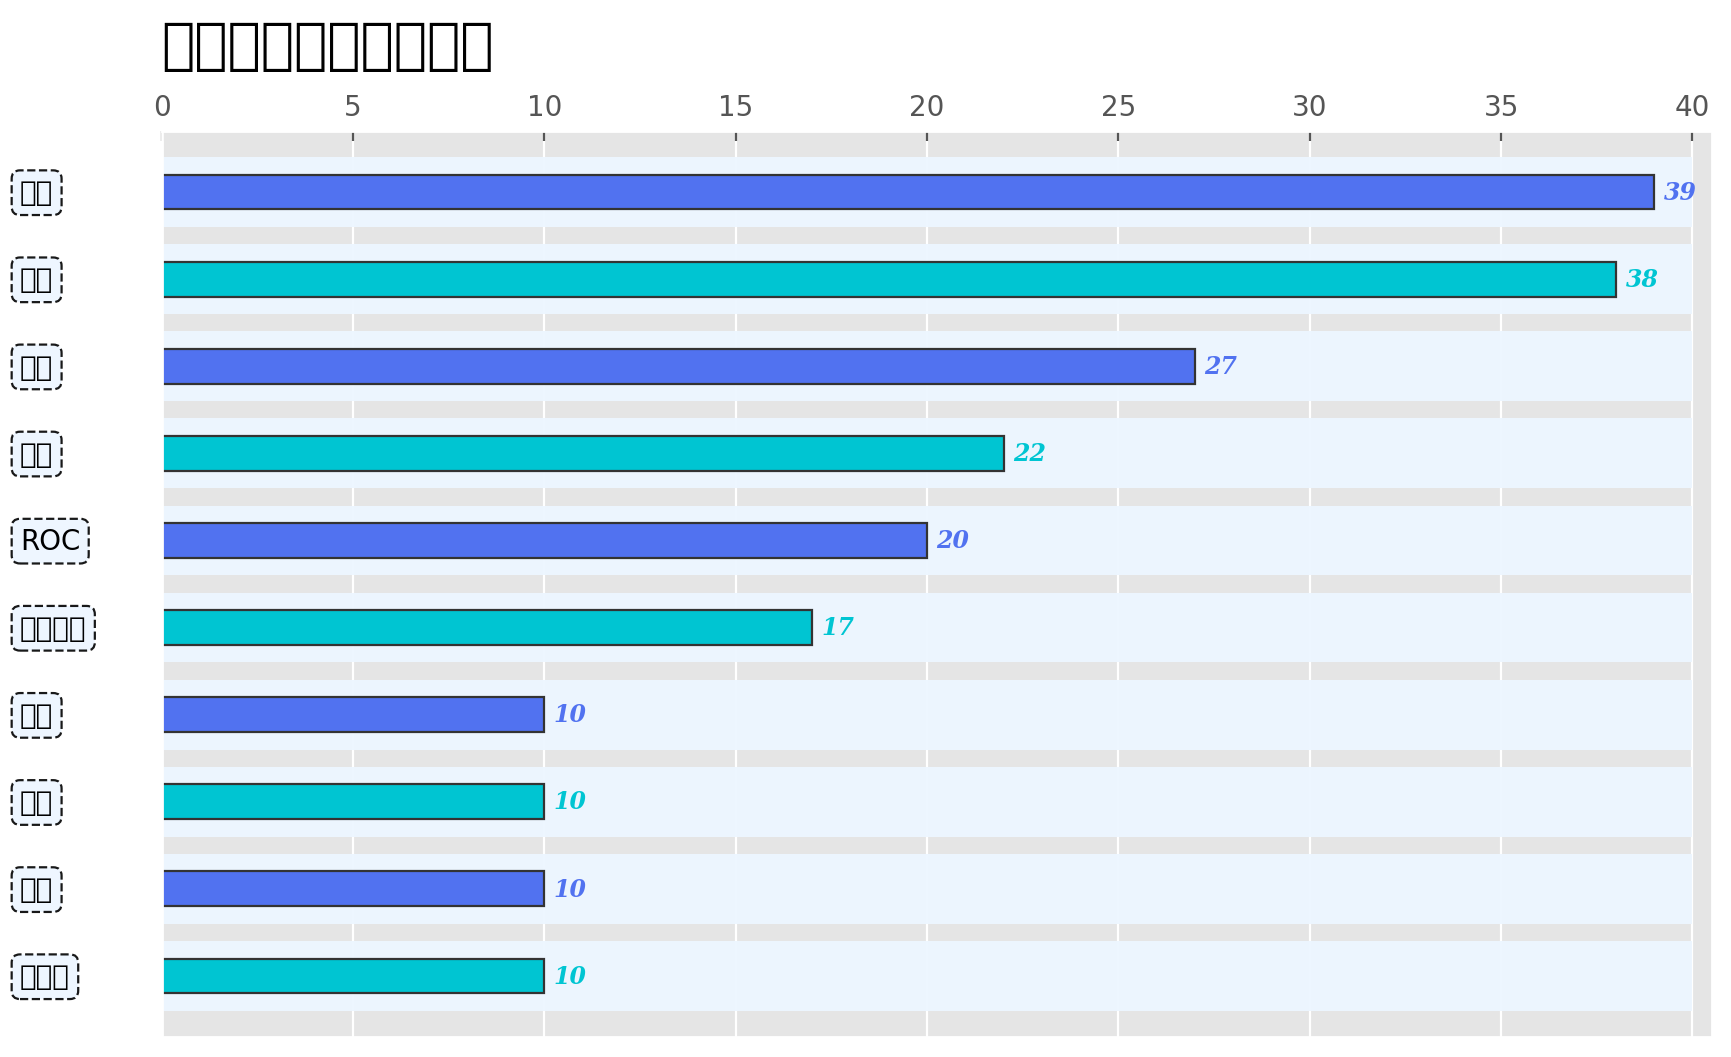

In [134]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.sans-serif'] = ['Songti SC']

n = 10
x = [i for i in range(n)]  # 共有多少个数据就设置多少个i
y1 = [40] * n  # 这里是x轴最大范围，也就是浅色部分长度，需要根据你的数据进行修改
counts = list(df1.head(10)['金牌数'])
countrys = list(df1.head(10)['国家奥委会'])


plt.figure(figsize=(10, 6), dpi=100)

plt.xlim(0, 40.5)  # 这里的1310修改成最大的x轴，比上面的y1大一点即可

plt.barh(x, y1, color='#EDF6FF', alpha=0.99)

for i in range(n):
    plt.barh(x[i], counts[::-1][i], color='#00C5D2' if x[i] %
             2 == 0 else '#5172F0', height=0.4, ec='#333', lw=0.8)

ax = plt.gca()

ax.xaxis.set_ticks_position('top')
ax.tick_params(direction='in')

ax.tick_params(bottom=False, top=True, left=False, right=False)

plt.yticks([])

plt.ylim(-0.7, 9.7)
for i in range(n):

    plt.text(-3.7, 8.9-i, f'{countrys[i]}', bbox=dict(boxstyle="round", fc="#EDF6FF",
                                                      ec="black", alpha=0.9, linestyle='--', linewidth=0.8), size=10)

    plt.text(counts[::-1][i]+0.25, i, f"{counts[::-1][i]}", fontsize=8.5, color='#00C5D2' if x[i] %
             2 == 0 else '#5172F0', verticalalignment='center',
             style='italic', family='serif', weight='heavy')


plt.text(0, 10.5, '东京奥运会金牌排行榜', size=20)

plt.show()

### 19 - 堆叠图

将排行榜前十名的奖牌绘制堆叠图

In [41]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.globals import ThemeType
gold = list(df1['金牌数'].head(10))
silver = list(df1['银牌数'].head(10))
bronze = list(df1['铜牌数'].head(10))
countrys = list(df1['国家奥委会'].head(10))



c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK))
    .add_xaxis(countrys)
    .add_yaxis("金牌🏅️", gold, stack="stack1",color ="#8F3605" )
    .add_yaxis("银牌🥈", silver, stack="stack1", color="#838383")
    .add_yaxis("铜牌🥉", bronze, stack="stack1", color='#FBED67')
    
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title="东京奥运会榜10奖牌分布"))
)

c.render_notebook()


In [47]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.globals import ThemeType
gold = list(df1['金牌数'].head(10))
silver = list(df1['银牌数'].head(10))
bronze = list(df1['铜牌数'].head(10))
countrys = list(df1['国家奥委会'].head(10))

c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK))
    .add_xaxis(countrys)
    .add_yaxis("金牌🏅️", gold, stack="stack1",color ="#8F3605" )
    .add_yaxis("银牌🥈", silver, stack="stack1", color="#838383")
    .add_yaxis("铜牌🥉", bronze, stack="stack1", color='#FBED67')
    
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title="东京奥运会榜10奖牌分布"))
)

c.render_notebook()

### 20 - 饼图

绘制中国队的奖牌分布饼图

In [28]:
data = pd.pivot_table(df2,values = ['奖牌类型'],index = ['国家','运动类别'],aggfunc = 'count').query("国家 == ['中国']")
jiangpai = list(data['奖牌类型'])
xiangmu = [data.index[i][1] for i in range(len(data))]

In [40]:
from pyecharts import options as opts
from pyecharts.charts import Pie

c = (
    Pie(init_opts=opts.InitOpts(theme=ThemeType.DARK))
    .add(
        "",
        [list(z) for z in zip(xiangmu, jiangpai)],
        radius=["40%", "75%"],
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="中国队奖牌分布"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .render_notebook()
)
c

In [30]:
from pyecharts import options as opts
from pyecharts.charts import Pie

c = (
    Pie(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add(
        "",
        [list(z) for z in zip(xiangmu, jiangpai)],
        radius=["40%", "75%"],
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="中国队奖牌分布"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .render_notebook()
)
c

### 21 - 地图

绘制各国奖牌分布热力地图

In [31]:
countrys = list(df1['国家奥委会'])
data = list(df1['总分'])
with open('name_map.json','r',encoding='utf8')as fp:
    name = json.load(fp)

NameError: name 'json' is not defined

In [32]:
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.faker import Faker

c = (
    Map()
    .add("", [list(z) for z in zip(countrys, data)], "world",is_map_symbol_show=False, name_map=name)
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="东京奥运会奖牌分布"),
        visualmap_opts=opts.VisualMapOpts(max_=200),
    )
    .render_notebook()
)

c

NameError: name 'name' is not defined

###  22 - 动态图

将排行榜前十名的奖牌变化动态展示

In [ ]:
! cd bar_chart_race-master;python setup.py install

In [468]:
import bar_chart_race as bcr

In [33]:
data = pd.pivot_table(df2,values = ['奖牌类型'],index = ['获奖时间','国家'],aggfunc = 'count').query("国家 == ['美国', '中国', '日本', '英国', 'ROC', '澳大利亚', '荷兰', '法国', '德国', '意大利']")
data = data.unstack()
data.columns = data.columns.get_level_values(1)
data.columns.name = None
data = data.cumsum()
data = data.fillna(axis=0,method='ffill').fillna(0)
data.columns = ['Russia', 'China','Italian', 'Japan', 'the Netherlands',' German ',' France ', 'Australia', 'US',' British ']

In [34]:
def time_format(x):
    x = x.replace('月','-')
    x = x.replace('日','')
    x = '2021-' + x
    return x
data = data.reset_index()
data['获奖时间'] = data['获奖时间'].map(time_format)
data['获奖时间'] = pd.to_datetime(data['获奖时间'])
data = data.set_index('获奖时间')

In [35]:
bcr.bar_chart_race(
    df=data,
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=30,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt='%Y-%m-%d',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total MEDALS: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=500,
    figsize=(5, 3),
    dpi=160,
    cmap='dark12',
    title='Tokyo 2021 Medal changes',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    #shared_fontdict={'family': 'Courier New', 'color': 'rebeccapurple'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)  

NameError: name 'bcr' is not defined